In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/u2071219/Git_repos/IM939_handbook_quarto/content/jupyterbook-demo':
  os.chdir(r'/Users/u2071219/Git_repos/IM939_handbook_quarto/content/jupyterbook-demo')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/importlib/_bootstrap.py": 1683745513.4482718, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/importlib/_bootstrap_external.py": 1683745513.4521089, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/codecs.py": 1683745510.3944337, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/encodings/aliases.py": 1683745512.012771, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/encodings/__init__.py": 1683745512.0060773, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/encodings/utf_8.py": 1683745512.7085767, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/abc.py": 1683745510.3148518, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/io.py": 1683745510.5219219, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/stat.py": 1683745510.723659, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/_collections_abc.py": 1683745510.269883, "/Users/u2071219/anaconda3/envs/IM939/lib/python3.10/genericpath.py": 1683745510.4

/var/folders/7v/zl9mv52s3ls94kntlt_l9ryh0000gq/T/ipykernel_17665/4217965025.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

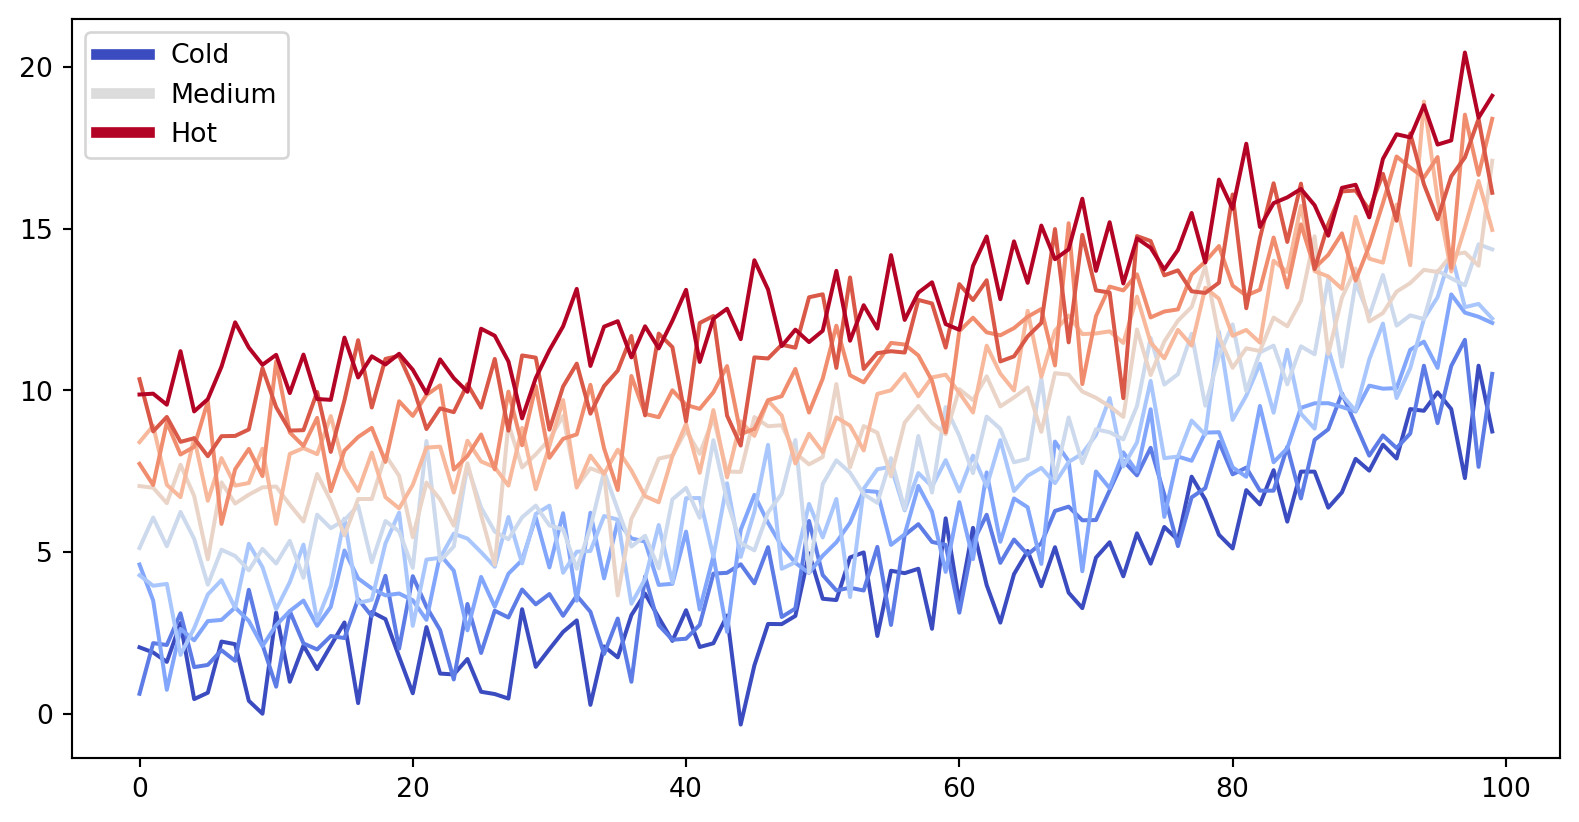

In [3]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);